In [4]:
# Read in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

song_data = pd.read_csv('data/song_data.csv')

In [6]:
# using the average we can make model like linear regression, decision tree, or forest

cleared_data = pd.read_csv('data/song_data.csv').drop(columns=['track_id', 'key']).dropna(how='any')

cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 'popular' if x > 75 else 'not_popular')

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_to_keep = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Filtering columns
# cleared_data = cleared_data[columns_to_keep]

# # Reshape the data to long format
# long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')
# 
# # Calculate the mean for each feature and diagnosis
# means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()
# 
# # Reshape the data back to wide format
# wide_means = means.pivot(index='feature', columns='popularity', values='value')
# 
# # Print the result
# print(wide_means)

# create a blx plot
# Create a box plot
# sns.set(style="whitegrid")
# g = sns.FacetGrid(long_data, col='feature', col_wrap=2, margin_titles=True,
#                   xlim=(long_data['value'].min(), long_data['value'].max()))
# g.map(sns.boxplot, 'value', 'popularity', 'popularity', order=['popular', 'not_popular'],
#       hue_order=['popular', 'not_popular'], palette={"popular": "tomato", "not_popular": "cyan"})
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")
# plt.legend().remove()  # Remove the legend
# plt.show()


In [1]:
song_data.describe()

NameError: name 'song_data' is not defined

In [ ]:
"""
Looking at the table above.
Popularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.
25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental
75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks
"""

In [ ]:
track_count = len(song_data.track_name.unique())
track_count

In [ ]:
# find duplicates
duplicate_rows = song_data[song_data.duplicated(['track_name'])]
len(duplicate_rows)

In [8]:
# drop duplicates
song_data = song_data.drop_duplicates(subset=['track_name'])
song_data

popular_songs = song_data[song_data['popularity'] > 75]

#### Genre Analysis 

In [9]:
genres = song_data.track_genre.unique()
len(genres)

113

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

/var/folders/wr/svzmgkks5q13hzsr_6sq82m40000gn/T/ipykernel_52835/1398396938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cleared_data['track_genre'].unique()[0:50],y=cleared_data['track_genre'].value_counts()[0:50], palette='rainbow')


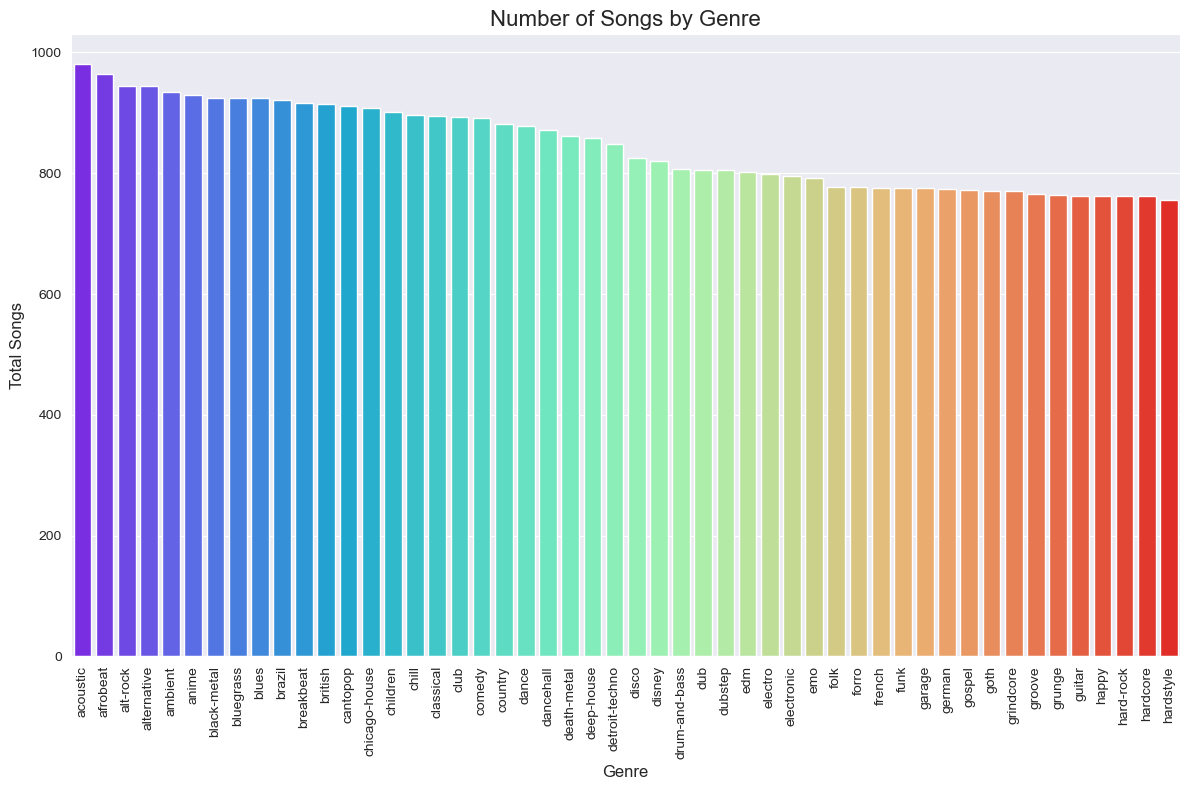

In [23]:
plt.figure(figsize=(12, 8))
print(cleared_data['track_genre'].unique())
print(cleared_data['track_genre'].value_counts())
cleared_data['genre_totals'] = cleared_data['track_genre'].value_counts()
sns.barplot(x=cleared_data['track_genre'].unique()[0:50],y=cleared_data['track_genre'].value_counts()[0:50], palette='rainbow')

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Songs', fontsize=12)
plt.title('Number of Songs by Genre', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
# Filter popular songs with the genre
club_genre_songs = popular_songs[popular_songs['track_genre'] == 'house']

# Calculate the mean popularity for the genre
mean_popularity_club_genre = club_genre_songs['popularity'].mean()

print("Mean popularity for the genre:", mean_popularity_club_genre)

In [ ]:
"""
Look into more songs in the genres with the highest count to discover popular and trending tracks.
Black metal, comedy and Afrobeats have the highest frequencies.

"""
# for exact numbers
genre_count = song_data['track_genre'].value_counts()
genre_count

#### Genre Vs Dancebility (or any other feature) with popular songs being > 75

In [ ]:

plt.figure(figsize=(12, 8))
    
sns.boxplot(data=popular_songs, x='track_genre', y='danceability', width=0.6)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Boxlplot of Genre and dancebility (or other feature with popularity > 75)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
"""
interpret boxplot:
genres with low dancibility 
genres with high dancibility 
can do with other features too

maybe drop irrelevent genres
"""

#### Audio

In [ ]:
# instrumentalness
count = song_data['instrumentalness'].value_counts()[0]
count

In [ ]:
# replce 0 with means
song_data['instrumentalness'] = song_data['instrumentalness'].replace(0, song_data['instrumentalness'].mean())
print(song_data['instrumentalness'])

In [ ]:
# convert explicit to boolean -  where 0 is False and 1 is True
song_data['explicit'] = song_data['explicit'].astype(int)
song_data['explicit']
explicit_tracks = song_data[song_data['explicit'] == 1]
print(explicit_tracks.head(10)) 

In [ ]:
# Corrlation heat map
# Drop unnecessary columns
columns_to_keep = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] # To remove each of the columns that aren't float/int64 values, along with the song index values
song_data = song_data[columns_to_keep]
song_data_df = song_data

# Calculate correlation matrix
correlation_matrix = song_data_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of song_data Features')
plt.show()

In [ ]:
# histograms to analyze each audio feature
song_data.hist(figsize=(15, 15), color = 'cyan')
plt.tight_layout()
plt.show()

The 'duration' distribution is also not uniform across the data and can be dropped.

The 'explicit' distribution is again discrete, and since most of the songs are non-explicit, we can drop this feature.

Most of the distributions are skewed and hence a suitable scaling technique is required for processing the dataset.

In [ ]:
song_data = song_data.drop(['duration_ms'], axis =1)

In [ ]:
# individual correlation with popularity
import numpy as np
from yellowbrick.target.feature_correlation import feature_correlation

# Drop non-numeric or irrelevant columns
X = song_data.drop(['popularity', 'track_genre'], axis=1)
y = song_data['popularity']

feature_names = X.columns.tolist()

visualizer = feature_correlation(X.values, y.values, labels=feature_names)
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot
from sklearn.linear_model import LinearRegression

def plot_feature(ax, feature_name, X, y, x_label):
    regr = LinearRegression()
    regr.fit(X, y)

    ax.scatter(X, y, alpha=0.5, label=f'{feature_name} vs. Popularity')
    ax.plot(X, regr.predict(X), color="red", linewidth=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Popularity")
    ax.set_title("Correlation")

# Create a single figure for all the subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# List of features and their corresponding column names
features = ["Valence", "Speechiness", "Acousticness", "Liveness", "Energy", "Instrumentalness", "Loudness", "Tempo"]
columns = ["valence", "speechiness", "acousticness", "liveness", "energy", "instrumentalness", "loudness", "tempo"]

for i, feature_name in enumerate(features):
    row, col = divmod(i, 3)
    plot_feature(
        axes[row, col],
        feature_name,
        song_data[[columns[i]]].values,
        song_data["popularity"].values,
        feature_name
    )
plt.show()

In [ ]:
# Robost Scaling - 
# Robust scaling produces a much wider range of values than the standard scaler. 
# Outliers cause the mean and standard deviation to soar to much higher values. 

from sklearn.preprocessing import RobustScaler
# Select the columns to be scaled (exclude 'track_genre')
numeric_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit', 'mode']

# Create a RobustScaler instance
scaler = RobustScaler()

# Apply Robust scaling to the selected columns
song_data[numeric_columns] = scaler.fit_transform(song_data[numeric_columns])

In [ ]:
song_data

In [ ]:
# Clustering by Genre
# Calculate the mean danceability and mean valence for each genre
genre_stats = song_data.groupby('track_genre').agg({'popularity': 'mean'}).reset_index()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['popularity']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['popularity']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Evaluating a KNN with 4-folds instead of 5-folds

# List of columns you want to keep (Including Key)
columns_to_keep = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_to_keep]
# Reshape the data to long format
long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')
# Calculate the mean for each feature and diagnosis
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()
# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')


In [ ]:
song_data[columns_to_keep]

## cluster For danceabilty and valence

In [ ]:
genre_stats = song_data.groupby('track_genre').agg({'danceability': 'mean', 'valence': 'mean'}).reset_index()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['danceability', 'valence']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['danceability', 'valence']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Number of clusters (you can adjust this based on your preference)
num_clusters = 5

# Perform K-Means clustering based on mean danceability and mean valence
kmeans = KMeans(n_clusters=num_clusters, random_state=10)
genre_stats['cluster'] = kmeans.fit_predict(genre_stats[['danceability', 'valence']])
custom_cluster_labels = list(range(num_clusters))

# Plot the clusters
plt.scatter(genre_stats['danceability'], genre_stats['valence'], c=genre_stats['cluster'], cmap='rainbow')
plt.xlabel('Mean Danceability')
plt.ylabel('Mean Valence')
plt.title('Clusters of Music Genres Based on Mean Danceability and Mean Valence')
plt.show()

# Display the cluster assignments
print(genre_stats[['track_genre', 'danceability', 'valence', 'cluster']])